In [65]:
import random
from math import ceil
import numpy as np

import mnist_loader
from importlib import reload
reload(mnist_loader)
training_data, validation_data, test_data = mnist_loader.load_data_wrapper()

NumberOfEpochs=30
SizeOfMiniBatches=10
eta=3
TrainingExamples=training_data[0]
TrainingExamplesAnswers=training_data[1]#List of correct outputs to training examples
#Each item in this is a vector x, where each scalar in x corresponds to an input for an input node.

TestingExamples=test_data[0]
TestingExamplesAnswers=test_data[1]
print(len(TestingExamplesAnswers))
NetworkConfig=[784,30,10]#This is a list of length Layers with NetworkConfig[i] being the number of neurons in Layer i

W=[]
B=[]
for layer in range(len(NetworkConfig)):
    if layer!=0:
        k=NetworkConfig[layer-1]
        j=NetworkConfig[layer]
    else:
        k=0
        j=0
    W.append(np.random.randn(j,k))
    B.append(np.random.randn(j,1))

def TrainNetwork(NumberOfEpochs,SizeOfMiniBatches,TrainingExamples,TrainingExamplesAnswers):
    
    NumberOfTrainingExamples=len(TrainingExamples)
    RandomizedTrainingExamplesIndexVector=list(range(NumberOfTrainingExamples))
    NumberOfMiniBatches=ceil(NumberOfTrainingExamples/SizeOfMiniBatches)
    
    for EpochNumber in range(NumberOfEpochs):
        random.shuffle(RandomizedTrainingExamplesIndexVector)
        MiniBatches=[]
        for index in range(NumberOfMiniBatches,0,-1):
            MiniBatches.append(RandomizedTrainingExamplesIndexVector[(index-1)*SizeOfMiniBatches:index*SizeOfMiniBatches])
        
        for MiniBatchCounter,MiniBatch in enumerate(MiniBatches):
            m=len(MiniBatch)
            dCxdw=[]
            dCxdb=[]
            #print( MiniBatch)
            for index in MiniBatch:
                dCdw,dCdb=BackPropogate(TrainingExamples[index],W,B,TrainingExamplesAnswers[index])
                dCxdw.append(dCdw)
                dCxdb.append(dCdb)
            for index in range(len(MiniBatch)):
                dCdw=dCxdw[index]
                dCdb=dCxdb[index]
                for l in range(1,len(dCdb)):
                    W[l]=W[l]-eta/m*(dCdw[l])
                    B[l]=B[l]-eta/m*(dCdb[l])
                #print('.',end="")
            #print('MiniBatch #',MiniBatchCounter+1, ' out of ', NumberOfMiniBatches,' complete!')
        TestNetwork(TestingExamples,W,B,TestingExamplesAnswers)
        print('Epoch #',EpochNumber+1, ' out of ', NumberOfEpochs,' complete!')
    print('Training Complete!')
        
def RunNetwork(InputVector,W,B):
    A=[]
    A.append(InputVector)
    for Layer in range(1,len(B)):
        A.append(Sigmoid(np.dot(W[Layer],A[-1])+B[Layer]))
    return A[-1]

def TestNetwork(testdata,W,B,correctanswers):
    tally=[]
    for index,InputVector in enumerate(testdata):
        if correctanswers[index]==np.argmax(RunNetwork(InputVector,W,B)):
            tally.append(1)
        else:
            tally.append(0)
    print(sum(tally))
    return tally

def BackPropogate(InputVector,W,B,CorrectOutputVector):
    A=[]
    A.append(InputVector)
    Z=[]
    Z.append(InputVector*np.nan)
    for Layer in range(1,len(B)):
        Z.append(np.dot(W[Layer],A[-1])+B[Layer])
        A.append(Sigmoid(Z[-1]))
    
    delta=[[] for i in range(len(B))]
    delta[-1]=np.multiply(NablaC(A[-1],CorrectOutputVector),SigmoidPrime(Z[-1]))
    
    for l in range(len(B)-2,0,-1):
        delta[l]=np.multiply(np.dot(np.transpose(W[l+1]),delta[l+1]),SigmoidPrime(Z[l]))
    
    dCdw=[[]]
    dCdb=[[]]
    for l in range(1,len(B)):
        dCdw.append(np.dot(delta[l],np.transpose(A[l-1])))
        dCdb.append(delta[l])
    return dCdw,dCdb

def Sigmoid(z):
    return 1.0/(1.0+np.exp(-z)) 
def SigmoidPrime(z):
    return Sigmoid(z)*(1-Sigmoid(z)) 
def NablaC(A,Y):
    return A-Y 

if __name__=='__main__':
    TestNetwork(TestingExamples,W,B,TestingExamplesAnswers)
    TrainNetwork(NumberOfEpochs,SizeOfMiniBatches,TrainingExamples,TrainingExamplesAnswers)

10000
1003
9045
Epoch # 1  out of  30  complete!
9215
Epoch # 2  out of  30  complete!
9312
Epoch # 3  out of  30  complete!
9358
Epoch # 4  out of  30  complete!
9335
Epoch # 5  out of  30  complete!
9421
Epoch # 6  out of  30  complete!
9421
Epoch # 7  out of  30  complete!
9437
Epoch # 8  out of  30  complete!
9441
Epoch # 9  out of  30  complete!
9463
Epoch # 10  out of  30  complete!
9467
Epoch # 11  out of  30  complete!
9471
Epoch # 12  out of  30  complete!
9443
Epoch # 13  out of  30  complete!
9458
Epoch # 14  out of  30  complete!
9485
Epoch # 15  out of  30  complete!
9469
Epoch # 16  out of  30  complete!
9449
Epoch # 17  out of  30  complete!
9422
Epoch # 18  out of  30  complete!
9503
Epoch # 19  out of  30  complete!
9471
Epoch # 20  out of  30  complete!
9489
Epoch # 21  out of  30  complete!
9502
Epoch # 22  out of  30  complete!
9491
Epoch # 23  out of  30  complete!
9491
Epoch # 24  out of  30  complete!
9512
Epoch # 25  out of  30  complete!
9501
Epoch # 26  out of

In [110]:
A=[]
A.append(TestingExamples[0])
for Layer in range(1,len(B)):
    A.append(Sigmoid(np.dot(W[Layer],A[-1])+B[Layer]))
A[-1][7]
A[-1]
#TestingExamplesAnswers[0]

array([[  3.23857886e-05],
       [  3.38539051e-11],
       [  6.24541335e-05],
       [  4.54801619e-05],
       [  1.44011455e-13],
       [  2.12608225e-05],
       [  7.42560660e-14],
       [  9.99998421e-01],
       [  5.41678300e-13],
       [  2.82666600e-10]])

In [51]:
W=[]
B=[]
for layer in range(len(NetworkConfig)):
    if layer!=0:
        k=NetworkConfig[layer-1]
        j=NetworkConfig[layer]
    else:
        k=0
        j=0
    W.append(np.random.randn(j,k))
    B.append(np.random.randn(j,1))
W

[array([], shape=(0, 0), dtype=float64),
 array([[ 0.97778388, -0.62467696,  1.21054173, ..., -0.14060628,
         -0.42915507, -0.29182231],
        [ 0.56524611,  1.10567003, -1.30561281, ..., -0.52742718,
          1.16745092, -1.59657467],
        [ 1.28235468,  1.80189959,  1.87061103, ..., -0.04651392,
          0.45044632, -1.79342301],
        ..., 
        [-0.00668617,  1.95276654, -1.34162114, ..., -0.866477  ,
          0.71312972, -0.7221502 ],
        [-0.68850389, -0.07445009, -0.87174062, ..., -1.0594832 ,
          1.28647713,  1.67950096],
        [-0.2206165 , -1.50771402,  1.26348136, ...,  0.76565868,
          0.41883709,  0.41545036]]),
 array([[-1.06490466, -0.55450856, -0.48437633,  1.44166228, -1.64230001,
         -0.9463753 , -1.67987805, -0.03375836,  0.73934042, -1.14955191,
          0.71706844, -1.4294188 ,  2.60287427,  0.25498266, -0.49836494,
         -0.58302613, -0.06735158,  1.29696332, -2.08868047, -0.66820043,
         -1.25147694,  0.92296416, 

In [54]:
    testdata=TestingExamples
    correctanswers=TestingExamplesAnswers
    tally=[]
    for index,InputVector in enumerate(testdata):
        A=[]
        A.append(InputVector)
        for Layer in range(1,len(B)):
            A.append(Sigmoid(np.dot(W[Layer],A[-1])+B[Layer]))
        #if all(correctanswers[index]==np.round(A[-1])):
        if np.argmax(correctanswers[index])==np.argmax(A[-1]):
            tally.append(1)
        else:
            tally.append(0)
    print(sum(tally))#/len(tally))

0


In [ ]:
dataoranswer=0
trainingindex=0
ndarray=type(training_data[dataoranswer][trainingindex])

In [58]:
np.argmax(A[-1])

6

In [63]:
np.argmax(correctanswers[10])

0

In [64]:
correctanswers

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

(784, 1)
[[  2.45504298e-07]
 [  2.07347992e-09]
 [  2.72380886e-04]
 [  4.07171070e-09]
 [  1.14490598e-04]
 [  6.42098169e-07]
 [  9.98511955e-01]
 [  9.01617289e-08]
 [  8.56273010e-06]
 [  1.59566266e-04]]
6
6


(-0.5, 27.5, 27.5, -0.5)

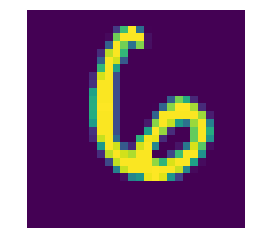

In [223]:
%matplotlib inline 
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt
n=88
InputVector=TestingExamples[n]
#InputVector=AA[-1].reshape((784,1))
print(InputVector.shape)
print(RunNetwork(InputVector,W,B))
print(np.argmax(RunNetwork(InputVector,W,B)))
print(TestingExamplesAnswers[n])
plt.imshow(InputVector.reshape((28,28)))
plt.axis('off')


In [126]:
#How can we create the ultimate six by backpropogation?
def InvSigmoid(z):
    #return -np.log(1/z-1)
    return 9999*(z-0.5)
def FindIdeal(OutputVector,W,B):
    A=[]
    A.append(OutputVector)
    for Layer in range(len(B)-1,0,-1):
        x=((np.dot(np.linalg.pinv(W[Layer]),(InvSigmoid(A[-1])-B[Layer]))))
        A.append(np.round((x+min(x))/(max(x)-min(x))))
    return A
OutputVector=np.ones((10,1))
OutputVector[3]=1
A=FindIdeal(OutputVector,W,B)
A

[array([[ 1.],
        [ 1.],
        [ 1.],
        [ 1.],
        [ 1.],
        [ 1.],
        [ 1.],
        [ 1.],
        [ 1.],
        [ 1.]]), array([[-1.],
        [-1.],
        [-1.],
        [-1.],
        [-1.],
        [-1.],
        [-1.],
        [-1.],
        [-1.],
        [-1.],
        [-1.],
        [-1.],
        [-1.],
        [-1.],
        [-1.],
        [-1.],
        [-1.],
        [-1.],
        [-1.],
        [-1.],
        [-1.],
        [-1.],
        [-2.],
        [-1.],
        [-1.],
        [-1.],
        [-1.],
        [-2.],
        [-1.],
        [-1.]]), array([[-0.],
        [-0.],
        [-0.],
        [-0.],
        [-1.],
        [-1.],
        [-1.],
        [-0.],
        [-1.],
        [-0.],
        [-1.],
        [-0.],
        [-0.],
        [-1.],
        [-0.],
        [-1.],
        [-0.],
        [-0.],
        [-0.],
        [-0.],
        [-1.],
        [-0.],
        [-0.],
        [-0.],
        [-0.],
        [-1.],
        

In [85]:
len(B)
list(range(len(B),0,-1))

[3, 2, 1]

In [90]:
list(range(len(B)-1,0,-1))

[2, 1]

In [100]:
A.append(np.dot(np.linalg.pinv(W[2]),(InvSigmoid(A[0])-B[2])))

C:\Users\t-darous\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: RuntimeWarning: divide by zero encountered in true_divide
  app.launch_new_instance()
C:\Users\t-darous\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: RuntimeWarning: divide by zero encountered in log
  app.launch_new_instance()


In [105]:
np.linalg.pinv(W[Layer])

array([[  9.01853576e-03,  -1.61781931e-02,   1.08786644e-02,
         -8.30330722e-03,  -1.05994025e-02,   1.35076121e-02,
          8.63933590e-03,   1.40190138e-03,  -5.88091067e-04,
          8.81445285e-03],
       [ -6.65373268e-03,   2.70603173e-03,   4.36509967e-03,
          1.46099642e-02,  -2.63323892e-03,   3.39333814e-03,
         -6.08498937e-03,   6.21137582e-03,  -1.63044037e-02,
         -7.92202486e-03],
       [ -1.26774308e-02,   3.66970526e-03,   1.59576212e-03,
         -1.22312470e-03,  -2.05685812e-02,  -5.03158515e-03,
          1.37156716e-02,  -1.73760851e-02,  -8.21298137e-03,
         -6.02530822e-03],
       [  1.01959709e-02,   4.54782292e-03,  -1.34379380e-02,
          7.19403134e-04,   7.75243145e-03,  -1.38444347e-02,
         -1.65692244e-02,  -2.50054924e-02,   7.90316588e-03,
         -6.55290132e-04],
       [ -2.15593533e-02,  -5.70406333e-03,   7.84321997e-03,
          2.08714702e-02,   1.33619623e-02,  -7.23490376e-03,
          1.70110955e-02

In [106]:
W[Layer]

array([[ 0.69386697, -1.94931214, -2.50794845,  4.87015934, -3.56695726,
        -0.01676099, -2.95085342,  0.44308891, -4.26423482,  2.59505938,
        -2.69836013,  3.47198018,  1.07830632, -3.25380307, -1.14325082,
         2.39060469,  1.68740109, -0.24931151, -3.79393188, -1.00810428,
         4.26540551, -3.56120789, -3.70352831, -0.23618601,  1.12461262,
        -0.40785183, -5.53923109,  3.44677647, -5.17965472,  0.34697778],
       [-4.20404518,  1.2625421 ,  3.13974965,  1.38846521, -1.16515828,
        -5.05692079, -1.57459461,  0.33999228,  1.94924975, -2.42392475,
        -3.81129493, -1.26872015, -1.05757217, -0.31223538,  5.44172881,
         1.48583579,  2.32565352,  4.63869688, -3.08420141, -2.29961227,
        -4.43113456, -2.00685583, -6.2549989 ,  5.36978521, -1.6182644 ,
         1.24079063,  0.69119897, -0.08412665,  1.0424795 ,  2.47275327],
       [ 2.46987147,  2.06325379,  1.37907276, -2.00782325,  0.42233124,
         4.84677941, -2.47860315,  2.45506366,  1

6
[[  8.11044775e-13]
 [  2.51631419e-05]
 [  8.82020183e-08]
 [  2.30134551e-13]
 [  3.46494990e-18]
 [  3.63288608e-03]
 [ -2.41521451e-02]
 [  1.03973049e-06]
 [  1.06810911e-18]
 [  7.02233865e-14]]


C:\Users\t-darous\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:5: RuntimeWarning: divide by zero encountered in true_divide
C:\Users\t-darous\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:5: RuntimeWarning: divide by zero encountered in log


[[ -1.11022302e-16]
 [ -1.97302824e-42]
 [ -1.11022302e-16]
 [  3.32222915e-33]
 [ -1.11022302e-16]
 [  1.06889112e-32]
 [ -3.67130396e-34]
 [ -1.11022302e-16]
 [ -1.11022302e-16]
 [ -1.11022302e-16]
 [ -1.11022302e-16]
 [ -2.69630192e-33]
 [  1.15555797e-33]
 [ -1.11022302e-16]
 [ -1.11022302e-16]
 [  3.70741514e-33]
 [ -1.11022302e-16]
 [  1.17481727e-32]
 [ -6.66133815e-16]
 [ -1.11022302e-16]
 [  3.85185989e-34]
 [  3.85185989e-34]
 [ -1.11022302e-16]
 [  9.38890848e-34]
 [ -1.11022302e-16]
 [ -1.11022302e-16]
 [ -1.11022302e-16]
 [ -1.11022302e-16]
 [ -3.65926689e-33]
 [ -1.11022302e-16]]
6


(-0.5, 27.5, 27.5, -0.5)

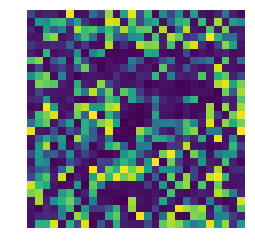

In [228]:
import scipy.optimize

def InvSigmoid(x):
    eps=500
    temp=-np.log(np.divide(1.0,x)-1.0)
    for ind,i in enumerate(temp):
        if np.isposinf(i):
            temp[ind]=eps
        elif np.isneginf(i):
            temp[ind]=-eps
    return temp

number=6
print(number)

OutputVector=np.zeros((10,1))
OutputVector[number]=1
def FindIdeal(OutputVector,W,B):
    A=[]
    A.append(OutputVector)
    for Layer in range(len(B)-1,0,-1):
        A.append((scipy.optimize.lsq_linear(W[Layer],np.squeeze(InvSigmoid(A[-1])-B[Layer]),bounds=(0,1))).x.reshape(((W[Layer].shape[1]),1)))
        #print(A[-2])
        print(Sigmoid(np.dot(W[Layer],A[-1])+B[Layer])-A[-2])
    return A
AA=FindIdeal(OutputVector,W,B)

%matplotlib inline 
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt
InputVector=AA[-1]
print(np.argmax(RunNetwork(InputVector,W,B)))
plt.imshow(InputVector.reshape((28,28)))
plt.axis('off')

In [222]:
A=RunNetwork(InputVector,W,B)
A

array([[  3.94270437e-10],
       [  4.76055390e-06],
       [  7.97327121e-10],
       [  9.99986676e-01],
       [  3.08797174e-16],
       [  9.37754504e-07],
       [  1.44149639e-11],
       [  7.92759385e-07],
       [  1.49517093e-14],
       [  2.40094207e-09]])

In [146]:
    x=OutputVector
    eps=1e16
    temp=-np.log(1/x-1)
    print(temp)
    for ind,i in enumerate(temp):
        print(i,ind,np.isposinf(i),np.isneginf(i))
        if np.isposinf(i):
            temp[ind]=eps
        elif np.isneginf(i):
            temp[ind]=-eps
    temp

C:\Users\t-darous\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: RuntimeWarning: divide by zero encountered in true_divide
  app.launch_new_instance()
C:\Users\t-darous\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: RuntimeWarning: divide by zero encountered in log
  app.launch_new_instance()


[[-inf]
 [-inf]
 [-inf]
 [-inf]
 [-inf]
 [-inf]
 [-inf]
 [-inf]
 [ inf]
 [-inf]]
[-inf] 0 [False] [ True]
[-inf] 1 [False] [ True]
[-inf] 2 [False] [ True]
[-inf] 3 [False] [ True]
[-inf] 4 [False] [ True]
[-inf] 5 [False] [ True]
[-inf] 6 [False] [ True]
[-inf] 7 [False] [ True]
[ inf] 8 [ True] [False]
[-inf] 9 [False] [ True]


array([[ -1.00000000e+16],
       [ -1.00000000e+16],
       [ -1.00000000e+16],
       [ -1.00000000e+16],
       [ -1.00000000e+16],
       [ -1.00000000e+16],
       [ -1.00000000e+16],
       [ -1.00000000e+16],
       [  1.00000000e+16],
       [ -1.00000000e+16]])

In [150]:
B[Layer].shape

(10, 1)

In [166]:
(scipy.optimize.lsq_linear(W[Layer],np.squeeze(InvSigmoid(A[-3])-B[Layer]),bounds=(0,1))).x.shape

C:\Users\t-darous\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:5: RuntimeWarning: divide by zero encountered in log


(30,)

In [168]:
np.squeeze(InvSigmoid(A[-3])-B[Layer]).shape

C:\Users\t-darous\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:5: RuntimeWarning: divide by zero encountered in log


(10,)